In [20]:
# conda env export > environment.yml
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
#from pandas import read_csv, set_option
from pandas import Series, datetime
from pandas.tools.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier
import seaborn as sns
import pickle
from datetime import date, timedelta
from datetime import datetime
import timeboard.calendars.US as US
import pytz
from urllib2 import Request
from urllib2 import  urlopen
import json
from pandas.io.json import json_normalize
import pandas.io.json as pd_json
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")


# Xgboost model:




In [16]:
# Loading the dataset to a dataframe
sentence_file = "Sentence_Polarity/msw_today.csv"
sentence_df = pd.read_csv(sentence_file)
sentence_df.head()
sentence_df = sentence_df.head(1)
sentence_df
# sentence_df.iloc[-1]

,Unnamed: 0,Unnamed: 0.1,Date,Title,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,0.0,2019-11,Pete Buttigieg joins top tier of candidates in...,100.0,0.0,100.0,0.0,0.0
1,1,1.0,2019-11,Chaotic aftermath of Alibaba's Singles' Day se...,NaN,NaN,NaN,NaN,NaN
2,2,2.0,2019-11,Mark Sanford suspends 2020 presidential campaign,NaN,NaN,NaN,NaN,NaN
3,3,3.0,2019-11,The Simpsons aspect ratio is messed up on Disney+,NaN,NaN,NaN,NaN,NaN
4,4,4.0,2019-11,Windows 10 November 2019 Update is now availab...,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,Unnamed: 0.1,Date,Title,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,0.0,2019-11,Pete Buttigieg joins top tier of candidates in...,100.0,0.0,100.0,0.0,0.0


In [6]:
# Check the shape and data types of the dataframe
print(sentence_df.shape)
print(sentence_df.dtypes) 
sentence_df['Subjectivity'] = sentence_df['Subjectivity'].astype(float)
sentence_df['Objectivity'] = sentence_df['Objectivity'].astype(float)
sentence_df['Positive'] = sentence_df['Positive'].astype(float)
sentence_df['Neutral'] = sentence_df['Neutral'].astype(float)
sentence_df['Negative'] = sentence_df['Negative'].astype(float)
print(sentence_df.dtypes) 

(1, 9)
Unnamed: 0        int64
Unnamed: 0.1    float64
Date             object
Title            object
Subjectivity    float64
Objectivity     float64
Positive        float64
Neutral         float64
Negative        float64
dtype: object
Unnamed: 0        int64
Unnamed: 0.1    float64
Date             object
Title            object
Subjectivity    float64
Objectivity     float64
Positive        float64
Neutral         float64
Negative        float64
dtype: object


In [7]:
# # pd.to_datetime(date.today())
# # str(date.today())
# yesterday = str(date.today() -  timedelta(days = 1))


# tz_NY = pytz.timezone('America/New_York') 
# datetime_NY = datetime.now(tz_NY)
# datetime_NY
# currentDayUS = str(pd.to_datetime(datetime_NY)).split(' ')[0]
# # print("NY time:", datetime_NY.strftime("%Y:%M:%S"))
# yesterdayUS = str(pd.to_datetime(datetime_NY) -  timedelta(days = 1)).split(' ')[0]
# # yesterday = pd.to_datetime(yesterdayUS)
# currentDayUS
# yesterdayUS

# clnd = US.Weekly8x5()
# lastWorkingDayUS = str(clnd(yesterdayUS).rollback().to_timestamp().date())
# lastWorkingDayUS

In [9]:
apiKey = '9AyXbJ2Mzk2M8ptCmzr4YEZTor4KEWBoBtLTscfz4x8Xugh6PnQxLjx38xbt'
index = '^DJI'
fromDate = '2019-11-06'
apiEndPoint = 'https://api.worldtradingdata.com/api/v1/history?symbol=' +index+ '&sort=newest&date_from=' +fromDate+ '&api_token=' + apiKey

request=Request(apiEndPoint)
response = urlopen(request)
elevations = response.read()
data = json.loads(elevations)
data

{u'history': {u'2019-11-06': {u'close': u'27492.56',
   u'high': u'27526.05',
   u'low': u'27407.81',
   u'open': u'27502.74',
   u'volume': u'243187265'},
  u'2019-11-07': {u'close': u'27674.80',
   u'high': u'27774.67',
   u'low': u'27590.16',
   u'open': u'27590.16',
   u'volume': u'263577159'},
  u'2019-11-08': {u'close': u'27681.24',
   u'high': u'27694.95',
   u'low': u'27578.97',
   u'open': u'27686.20',
   u'volume': u'222786014'},
  u'2019-11-11': {u'close': u'27691.49',
   u'high': u'27714.39',
   u'low': u'27517.67',
   u'open': u'27580.66',
   u'volume': u'204621806'},
  u'2019-11-12': {u'close': u'27691.49',
   u'high': u'27770.86',
   u'low': u'27635.32',
   u'open': u'27701.59',
   u'volume': u'213668945'}},
 u'name': u'^DJI'}

In [13]:
df = pd_json.json_normalize(data, 
                            record_path='history', 
                            meta=['history'])

numberOfRows = len(df.index)
stonks = pd.DataFrame(index=np.arange(0, numberOfRows), columns=('Date', 'Open', 'High','Low','Close', 'Volume'))
for idx , date in enumerate(data['history']): 
    stonks.loc[idx] = [date 
                       ,data['history'][date]['open']
                       ,data['history'][date]['high']
                       ,data['history'][date]['low']
                       ,data['history'][date]['close']
                       ,data['history'][date]['volume']
                       ]
numberOfRows
stonks.head()
stonks = stonks.sort_values(by = 'Date', ascending = 0)

# Check the shape and datatypes of the stock prices dataframe
# stock_data = stonks.head(1)
stock_data =  stonks
stock_data.head()
stock_data = stock_data.reset_index(drop=True)
stock_data.head()
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Open'] = stock_data['Open'].astype(float)
stock_data['High'] = stock_data['High'].astype(float)
stock_data['Low'] = stock_data['Low'].astype(float)
stock_data['Close'] = stock_data['Close'].astype(float)
stock_data['Volume'] = stock_data['Volume'].astype(float)
stock_data = stock_data.head(1)
stock_data
print(stock_data.shape)

5

,Date,Open,High,Low,Close,Volume
0,2019-11-06,27502.74,27526.05,27407.81,27492.56,243187265
1,2019-11-07,27590.16,27774.67,27590.16,27674.80,263577159
2,2019-11-11,27580.66,27714.39,27517.67,27691.49,204621806
3,2019-11-08,27686.20,27694.95,27578.97,27681.24,222786014
4,2019-11-12,27701.59,27770.86,27635.32,27691.49,213668945


,Date,Open,High,Low,Close,Volume
4,2019-11-12,27701.59,27770.86,27635.32,27691.49,213668945
2,2019-11-11,27580.66,27714.39,27517.67,27691.49,204621806
3,2019-11-08,27686.20,27694.95,27578.97,27681.24,222786014
1,2019-11-07,27590.16,27774.67,27590.16,27674.80,263577159
0,2019-11-06,27502.74,27526.05,27407.81,27492.56,243187265


,Date,Open,High,Low,Close,Volume
0,2019-11-12,27701.59,27770.86,27635.32,27691.49,213668945
1,2019-11-11,27580.66,27714.39,27517.67,27691.49,204621806
2,2019-11-08,27686.20,27694.95,27578.97,27681.24,222786014
3,2019-11-07,27590.16,27774.67,27590.16,27674.80,263577159
4,2019-11-06,27502.74,27526.05,27407.81,27492.56,243187265


,Date,Open,High,Low,Close,Volume
0,2019-11-12,27701.59,27770.86,27635.32,27691.49,213668945.0


(1, 6)


In [18]:
# Create a dataframe by merging the headlines and the stock prices dataframe
merged_dataframe = sentence_df[[ 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner',right_index=True, left_index=True)
# Check the shape and top 5 rows of the merged dataframe
print(merged_dataframe.shape)
merged_dataframe.head()

# Push the Label column to the end of the dataframe
cols = list(merged_dataframe)
# print(cols)
cols.insert(0,cols.pop(cols.index('Date')))
merged_dataframe = merged_dataframe.ix[:, cols]
merged_dataframe.head()
merged_dataframe.dtypes

(1, 11)


,Subjectivity,Objectivity,Positive,Negative,Neutral,Date,Open,High,Low,Close,Volume
0,100.0,0.0,100.0,0.0,0.0,2019-11-12,27701.59,27770.86,27635.32,27691.49,213668945.0


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume
0,2019-11-12,100.0,0.0,100.0,0.0,0.0,27701.59,27770.86,27635.32,27691.49,213668945.0


Date            datetime64[ns]
Subjectivity           float64
Objectivity            float64
Positive               float64
Negative               float64
Neutral                float64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
dtype: object

In [19]:
# Print the datatypes and count of the dataframe
# print(merged_dataframe.dtypes)
print(merged_dataframe.count())


X_test = merged_dataframe.loc[:,'Subjectivity':'Volume']
X_test
# y = merged_dataframe.loc[:,'Label']


Date            1
Subjectivity    1
Objectivity     1
Positive        1
Negative        1
Neutral         1
Open            1
High            1
Low             1
Close           1
Volume          1
dtype: int64


,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume
0,100.0,0.0,100.0,0.0,0.0,27701.59,27770.86,27635.32,27691.49,213668945.0


In [21]:
pca = PCA(n_components=3)
pca = pickle.load(open("pca_3.pickle.dat", "rb"))
# pca.fit(X_test)
# X_test.dtypes
transformed = pca.transform(X_test)
transformed

transformed.shape
print(type(transformed))

array([[5.11921455e+07, 3.09100627e+04, 5.44456729e+01]])

(1L, 3L)

<type 'numpy.ndarray'>


In [22]:
pca_df = pd.DataFrame(transformed)

clf = XGBClassifier(n_estimators=500, max_depth=3)
clf = pickle.load(open("xgboost_500_3.pickle.dat", "rb"))

y_pred_pca = clf.predict(pca_df)
y_pred_pca[0]
#zero tells if market  will go down or up(1)

0

# ARIMA model for stock price:




In [24]:
apiKey = '9AyXbJ2Mzk2M8ptCmzr4YEZTor4KEWBoBtLTscfz4x8Xugh6PnQxLjx38xbt'
index = '^DJI'
apiEndPoint = 'https://api.worldtradingdata.com/api/v1/history?symbol=' +index+ '&sort=oldest&date_from=2009-08-08&api_token=' + apiKey

request=Request(apiEndPoint)
response = urlopen(request)
elevations = response.read()
data = json.loads(elevations)
# data.head()

In [25]:
df = pd_json.json_normalize(data, 
                            record_path='history', 
                            meta=['history'])

numberOfRows = len(df.index)
stonks = pd.DataFrame(index=np.arange(0, numberOfRows), columns=('Date', 'Open', 'High','Low','Close', 'Volume'))
for idx , date in enumerate(data['history']): 
    stonks.loc[idx] = [date 
                       ,data['history'][date]['open']
                       ,data['history'][date]['high']
                       ,data['history'][date]['low']
                       ,data['history'][date]['close']
                       ,data['history'][date]['volume']
                       ]
numberOfRows
stonks.head()

2580

,Date,Open,High,Low,Close,Volume
0,2018-03-06,24965.89,24995.24,24708.41,24884.12,331766021
1,2019-06-06,25567.45,25800.30,25518.05,25720.66,248068144
2,2019-06-07,25768.72,26072.75,25768.72,25983.94,263011043
3,2019-06-04,24962.82,25343.77,24962.82,25332.18,281688224
4,2018-03-07,24758.15,24849.68,24535.12,24801.36,394070603


In [29]:

# Check the shape and datatypes of the stock prices dataframe
stock_data = stonks
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Open'] = stock_data['Open'].astype(float)
stock_data['High'] = stock_data['High'].astype(float)
stock_data['Low'] = stock_data['Low'].astype(float)
stock_data['Close'] = stock_data['Close'].astype(float)
stock_data['Volume'] = stock_data['Volume'].astype(float)

merged_dataframe = stock_data
# Print the datatypes and count of the dataframe
print(merged_dataframe.dtypes)
print(merged_dataframe.count())
# # Change the NaN values to the mean value of that column
# nan_list = ['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']
# for col in nan_list:
#     merged_dataframe[col] = merged_dataframe[col].fillna(merged_dataframe[col].mean())

    
merged_dataframe['Date'] = merged_dataframe['Date'].dt.strftime('%Y-%m')
# df_dateclose = pd.Series(merged_dataframe['Close'].values, index = merged_dataframe['Date'])
merged_dataframe.head()

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object
Date      2580
Open      2580
High      2580
Low       2580
Close     2580
Volume    2580
dtype: int64


,Date,Open,High,Low,Close,Volume
0,2018-03,24965.89,24995.24,24708.41,24884.12,331766021.0
1,2019-06,25567.45,25800.30,25518.05,25720.66,248068144.0
2,2019-06,25768.72,26072.75,25768.72,25983.94,263011043.0
3,2019-06,24962.82,25343.77,24962.82,25332.18,281688224.0
4,2018-03,24758.15,24849.68,24535.12,24801.36,394070603.0


In [32]:
merged_dataframe = merged_dataframe.sort_values(by = 'Date')
merged_dataframe.head()
merged_dataframe = merged_dataframe.reset_index(drop=True)
merged_dataframe.head()

,Date,Open,High,Low,Close,Volume
0,2009-08,9347.86,9519.11,9347.25,9505.96,293528544.0
15,2009-08,9509.21,9620.00,9508.98,9539.29,173892992.0
14,2009-08,9362.29,9406.50,9305.31,9398.19,145615904.0
13,2009-08,9236.06,9424.11,9221.02,9361.61,197420816.0
11,2009-08,9368.41,9371.96,9290.34,9337.95,161365312.0


,Date,Open,High,Low,Close,Volume
0,2009-08,9347.86,9519.11,9347.25,9505.96,293528544.0
1,2009-08,9509.21,9620.00,9508.98,9539.29,173892992.0
2,2009-08,9362.29,9406.50,9305.31,9398.19,145615904.0
3,2009-08,9236.06,9424.11,9221.02,9361.61,197420816.0
4,2009-08,9368.41,9371.96,9290.34,9337.95,161365312.0


In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_dateclose.values, p_values, d_values, q_values)

# Close Values

In [38]:
df_dateclose = pd.Series(merged_dataframe['Close'].values, index = merged_dataframe['Date'])
df_dateclose.head()

X = df_dateclose.values
X
len(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
len(train)
len(test)
# train
history = [x for x in train]
len(history)
predictions = list()
# predictions
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast()
yhat = output[0]
print ("Tomorrows Prediction: %f " % (yhat))

Date
2009-08    9505.96
2009-08    9539.29
2009-08    9398.19
2009-08    9361.61
2009-08    9337.95
dtype: float64

array([ 9505.96,  9539.29,  9398.19, ..., 27674.8 , 27492.56, 27691.49])

2580

1702

878

1702

Tomorrows Prediction: 27698.541388 


Date
2009-08    9505.96
2009-08    9539.29
2009-08    9398.19
2009-08    9361.61
2009-08    9337.95
dtype: float64

array([ 9505.96,  9539.29,  9398.19, ..., 27674.8 , 27492.56, 27691.49])

2580

1702

878

1702

predicted=17736.917833, expected=17851.510000
predicted=17781.975153, expected=17787.200000
predicted=17788.696386, expected=17651.260000
predicted=17745.378208, expected=17435.400000
predicted=17641.469126, expected=17740.630000
predicted=17681.081596, expected=17710.710000
predicted=17696.291948, expected=17706.050000
predicted=17704.533400, expected=17529.980000
predicted=17648.147866, expected=17535.320000
predicted=17613.342327, expected=17750.910000
predicted=17666.370098, expected=17526.620000
predicted=17622.161559, expected=17711.120000
predicted=17658.119960, expected=17873.220000
predicted=17738.307819, expected=17865.340000
predicted=17787.701903, expected=17804.870000
predicted=17798.580662, expected=17674.820000
predicted=17760.032661, expected=17140.240000
predicted=17547.570057, expected=17732.480000
predicted=17617.238083, expected=17829.730000
predicted=17696.332400, expected=17694.680000
predicted=17700.540483, expected=17929.990000
predicted=17785.587572, expected=1

predicted=19911.301442, expected=19855.530000
predicted=19897.227846, expected=19887.380000
predicted=19899.305810, expected=20837.440000
predicted=20234.609207, expected=20611.860000
predicted=20374.427409, expected=20743.000000
predicted=20511.993265, expected=20172.400000
predicted=20396.909095, expected=20810.320000
predicted=20549.055428, expected=20821.760000
predicted=20651.911884, expected=20812.240000
predicted=20714.971916, expected=20269.370000
predicted=20562.805575, expected=20071.460000
predicted=20394.766435, expected=20054.340000
predicted=20279.454022, expected=20504.410000
predicted=20365.148267, expected=20052.420000
predicted=20260.025129, expected=19890.940000
predicted=20134.388395, expected=20412.160000
predicted=20238.816787, expected=20090.290000
predicted=20191.845408, expected=20619.770000
predicted=20349.026352, expected=20624.050000
predicted=20452.254779, expected=20775.600000
predicted=20573.015266, expected=19884.910000
predicted=20335.190330, expected=2

predicted=22822.158366, expected=22557.600000
predicted=22733.282686, expected=23434.190000
predicted=22991.861360, expected=23377.240000
predicted=23137.610953, expected=23157.600000
predicted=23151.474324, expected=22661.640000
predicted=22981.742637, expected=22775.390000
predicted=22914.075800, expected=22841.010000
predicted=22894.284688, expected=22871.720000
predicted=22892.660652, expected=23328.630000
predicted=23055.838022, expected=23441.760000
predicted=23201.378906, expected=23348.740000
predicted=23261.248412, expected=23400.860000
predicted=23318.364807, expected=23273.960000
predicted=23309.014435, expected=23271.280000
predicted=23302.085962, expected=23461.940000
predicted=23366.395302, expected=23458.360000
predicted=23406.276232, expected=23358.240000
predicted=23395.663047, expected=23563.360000
predicted=23462.856202, expected=24272.350000
predicted=23762.402888, expected=23539.190000
predicted=23688.186366, expected=23548.420000
predicted=23644.602868, expected=2

predicted=24871.193006, expected=24174.820000
predicted=24628.100128, expected=24700.450000
predicted=24660.943289, expected=25414.100000
predicted=24937.121004, expected=25199.290000
predicted=25037.874070, expected=24307.180000
predicted=24784.142929, expected=25451.060000
predicted=25028.007571, expected=24919.660000
predicted=24996.439246, expected=24924.890000
predicted=24977.957420, expected=25241.940000
predicted=25078.545558, expected=25527.070000
predicted=25244.967852, expected=25058.120000
predicted=25185.484686, expected=24356.740000
predicted=24898.797609, expected=25064.500000
predicted=24964.467415, expected=25119.890000
predicted=25026.341854, expected=25064.360000
predicted=25046.693086, expected=25415.190000
predicted=25183.937925, expected=25306.830000
predicted=25234.435587, expected=25044.290000
predicted=25174.126488, expected=24776.590000
predicted=25040.544065, expected=25019.410000
predicted=25039.959985, expected=25462.580000
predicted=25196.167817, expected=2

predicted=25739.791954, expected=25928.680000
predicted=25812.665383, expected=25914.100000
predicted=25854.953144, expected=25745.670000
predicted=25823.446792, expected=25962.510000
predicted=25878.902619, expected=25502.320000
predicted=25753.847921, expected=25450.240000
predicted=25654.194915, expected=26384.770000
predicted=25916.369911, expected=26656.390000
predicted=26182.472239, expected=26597.050000
predicted=26335.686648, expected=26462.080000
predicted=26387.319906, expected=26157.160000
predicted=26313.218818, expected=26412.300000
predicted=26354.960587, expected=26554.390000
predicted=26432.002751, expected=26592.910000
predicted=26495.577136, expected=26449.540000
predicted=26486.388228, expected=26179.130000
predicted=26385.429778, expected=26143.050000
predicted=26307.207230, expected=26511.050000
predicted=26385.748127, expected=26384.630000
predicted=26392.298363, expected=26341.020000
predicted=26381.237378, expected=26150.580000
predicted=26307.164639, expected=2

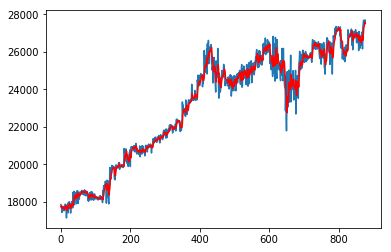

In [33]:
df_dateclose = pd.Series(merged_dataframe['Close'].values, index = merged_dataframe['Date'])
df_dateclose.head()

X = df_dateclose.values
X
len(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
len(train)
len(test)
# train
history = [x for x in train]
len(history)
predictions = list()
# predictions
model = ARIMA(X, order=(0,1,1))
model_fit = model.fit(disp=0)
output = model_fit.forecast()
yhat = output[0]
print ("Tomorrows Prediction: %f " % (yhat))


final_model = None 
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    if (t == (len(test) -1) ):
        history.append(obs)
        model = ARIMA(history, order=(0,1,1))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        print ("Tomorrows Prediction: %f " % (yhat))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Open Values

In [40]:
df_dateclose = pd.Series(merged_dataframe['Open'].values, index = merged_dataframe['Date'])
df_dateclose.head()

X = df_dateclose.values
X
len(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
len(train)
len(test)
# train
history = [x for x in train]
len(history)
predictions = list()
# predictions
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast()
yhat = output[0]
print ("Tomorrows Prediction: %f " % (yhat))

Date
2009-08    9347.86
2009-08    9509.21
2009-08    9362.29
2009-08    9236.06
2009-08    9368.41
dtype: float64

array([ 9347.86,  9509.21,  9362.29, ..., 27590.16, 27502.74, 27580.66])

2580

1702

878

1702

Tomorrows Prediction: 27555.321793 


Date
2009-08    9347.86
2009-08    9509.21
2009-08    9362.29
2009-08    9236.06
2009-08    9368.41
dtype: float64

array([ 9347.86,  9509.21,  9362.29, ..., 27590.16, 27502.74, 27580.66])

2580

1702

878

1702

predicted=17716.375538, expected=17735.090000
predicted=17727.694336, expected=17891.500000
predicted=17788.791969, expected=17735.020000
predicted=17775.276987, expected=17514.160000
predicted=17690.653999, expected=17650.300000
predicted=17681.680583, expected=17531.760000
predicted=17635.088267, expected=17525.190000
predicted=17602.167332, expected=17701.460000
predicted=17641.075485, expected=17711.120000
predicted=17669.936971, expected=17870.750000
predicted=17743.677210, expected=17501.280000
predicted=17665.428603, expected=17919.030000
predicted=17757.173837, expected=17826.850000
predicted=17785.951269, expected=17938.820000
predicted=17843.286690, expected=17736.870000
predicted=17811.717653, expected=17710.770000
predicted=17782.031424, expected=17355.210000
predicted=17640.601745, expected=17830.500000
predicted=17710.555590, expected=17827.330000
predicted=17755.371638, expected=17456.020000
predicted=17657.796801, expected=17712.760000
predicted=17681.422249, expected=1

predicted=19904.269878, expected=19876.350000
predicted=19900.281360, expected=19931.410000
predicted=19916.549288, expected=20808.710000
predicted=20228.071558, expected=20504.270000
predicted=20329.493228, expected=20663.430000
predicted=20451.378311, expected=20061.730000
predicted=20322.352226, expected=20817.210000
predicted=20498.532920, expected=20751.910000
predicted=20592.120421, expected=20833.880000
predicted=20681.949738, expected=20211.230000
predicted=20525.246853, expected=19964.210000
predicted=20337.993623, expected=20049.290000
predicted=20243.859413, expected=20374.220000
predicted=20294.709390, expected=20025.610000
predicted=20207.540860, expected=19923.810000
predicted=20114.976815, expected=20338.540000
predicted=20198.019770, expected=20107.620000
predicted=20172.511779, expected=20627.310000
predicted=20335.012669, expected=20564.130000
predicted=20419.907855, expected=20715.410000
predicted=20528.039166, expected=19858.340000
predicted=20302.945208, expected=2

predicted=22777.306605, expected=22423.470000
predicted=22659.418142, expected=23419.160000
predicted=22932.210779, expected=23369.220000
predicted=23092.517699, expected=23087.130000
predicted=23097.262346, expected=22645.670000
predicted=22945.512600, expected=22669.080000
predicted=22855.258011, expected=22854.850000
predicted=22861.634431, expected=22876.430000
predicted=22873.338072, expected=23205.180000
predicted=22996.014046, expected=23346.780000
predicted=23125.550362, expected=23405.750000
predicted=23230.762668, expected=23380.890000
predicted=23290.378411, expected=23348.950000
predicted=23317.734950, expected=23334.590000
predicted=23330.392068, expected=23492.090000
predicted=23394.046835, expected=23365.340000
predicted=23390.689314, expected=23433.770000
predicted=23412.598142, expected=23542.600000
predicted=23465.116001, expected=24013.800000
predicted=23665.422376, expected=23549.590000
predicted=23631.327179, expected=23533.960000
predicted=23603.867334, expected=2

predicted=25105.393747, expected=24352.470000
predicted=24852.925315, expected=24359.390000
predicted=24689.646175, expected=24789.480000
predicted=24730.971091, expected=25183.700000
predicted=24893.537828, expected=25133.790000
predicted=24983.072446, expected=24161.530000
predicted=24708.205585, expected=25520.520000
predicted=24992.711675, expected=24806.970000
predicted=24936.283195, expected=24802.900000
predicted=24897.752900, expected=25092.430000
predicted=24970.982803, expected=25468.550000
predicted=25147.585067, expected=25041.140000
predicted=25118.238750, expected=24285.820000
predicted=24842.124127, expected=25139.150000
predicted=24950.031002, expected=25033.920000
predicted=24985.400972, expected=25025.580000
predicted=25005.950824, expected=25345.210000
predicted=25127.977127, expected=25439.320000
predicted=25240.798446, expected=25036.900000
predicted=25178.507287, expected=24519.200000
predicted=24962.026707, expected=24926.070000
predicted=24956.708288, expected=2

predicted=25733.518527, expected=25637.230000
predicted=25707.447328, expected=25827.310000
predicted=25755.064078, expected=25801.880000
predicted=25777.792615, expected=25867.790000
predicted=25815.252811, expected=25688.440000
predicted=25778.799960, expected=25844.650000
predicted=25808.014161, expected=25347.380000
predicted=25657.770298, expected=26407.760000
predicted=25919.763206, expected=26513.830000
predicted=26129.232360, expected=26652.560000
predicted=26315.759081, expected=26426.370000
predicted=26360.812403, expected=26173.710000
predicted=26303.622261, expected=26357.790000
predicted=26329.123358, expected=26559.870000
predicted=26415.052478, expected=26594.560000
predicted=26483.543391, expected=26468.530000
predicted=26485.428866, expected=26213.550000
predicted=26399.425633, expected=26188.210000
predicted=26334.157998, expected=26510.770000
predicted=26401.531799, expected=26213.420000
predicted=26344.187377, expected=26312.670000
predicted=26340.364967, expected=2

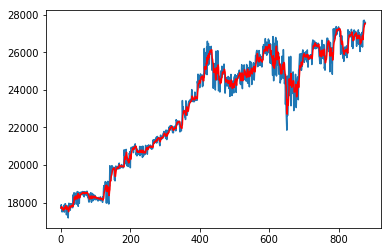

In [34]:
df_dateclose = pd.Series(merged_dataframe['Open'].values, index = merged_dataframe['Date'])
df_dateclose.head()

X = df_dateclose.values
X
len(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
len(train)
len(test)
# train
history = [x for x in train]
len(history)
predictions = list()
# predictions
final_model = None 
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    if (t == (len(test) -1) ):
        history.append(obs)
        model = ARIMA(history, order=(0,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        print ("Tomorrows Prediction: %f " % (yhat))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()